In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
d = pd.read_csv("C:\\Users\\ishat\\OneDrive\\Desktop\\ai\\ml\\slr\\placements_new.csv")
d

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


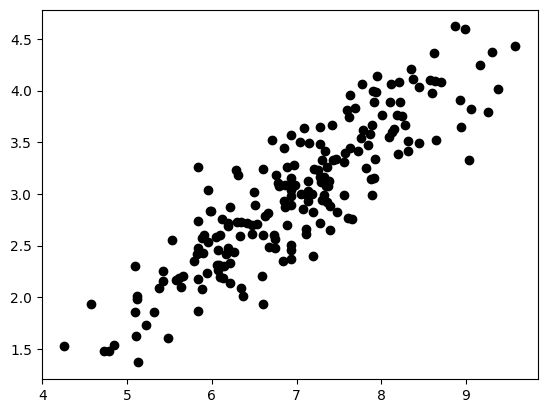

In [6]:
plt.scatter(d["cgpa"], d["package"], color = "black")

# seperate Input and Output data

In [9]:
x = d.iloc[:,0:1]   #input data
y = d["package"]      #output data

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

# Split data for training and testing(input and output)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 79 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [13]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 95 to 76
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [14]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 160 entries, 79 to 102
Series name: package
Non-Null Count  Dtype  
--------------  -----  
160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [15]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 40 entries, 95 to 76
Series name: package
Non-Null Count  Dtype  
--------------  -----  
40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


# Import Algorithm

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [21]:
d.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [22]:
#  y = mx+b
m = model.coef_
b = model.intercept_



y = m * 6.89 + b
y

array([2.92962016])

In [23]:
y_pred = model.predict(x_test)

In [24]:
y = m * 9.89 + b
y

array([4.65238958])

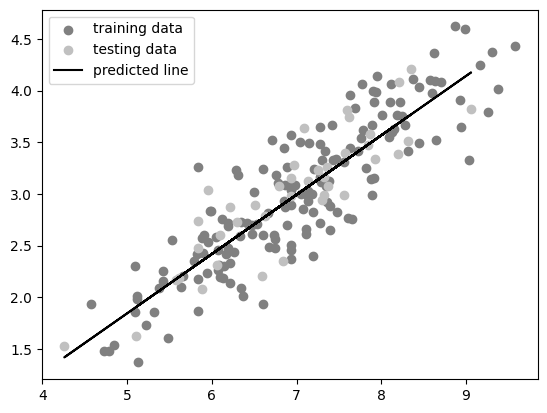

In [28]:
plt.scatter(x_train, y_train, color = "grey", label = "training data")
plt.scatter(x_test, y_test, color = "silver", label = "testing data")
plt.plot(x_test, y_pred, color = "black", label = "predicted line")
plt.legend()

In [29]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.7730984312051673

In [32]:
import joblib

In [34]:
joblib.dump(model, "package_predictor.joblib")

['package_predictor.joblib']